# MSCS 634 - Lab 5: Clustering with Hierarchical and DBSCAN  
**Name:** Sindhuja Martha  
**Course:** MSCS 634  
**Lab Title:** Clustering Analysis using Hierarchical and DBSCAN  

## Step 1: Data Preparation and Exploration
In this step, we will:
- Load the Wine dataset from `sklearn.datasets`.
- Explore its structure using `.head()`, `.info()`, and `.describe()`.
- Standardize the features for better clustering performance.


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Explore the dataset
display(X.head())
display(X.info())
display(X.describe())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Step 2: Hierarchical Clustering
We will:
- Apply **Agglomerative Hierarchical Clustering** to the dataset.
- Visualize clusters using scatter plots.
- Generate a **dendrogram** to understand the hierarchical structure.
- Experiment with different `n_clusters` values.


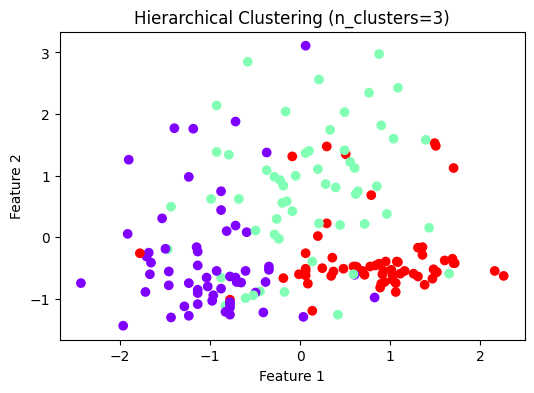

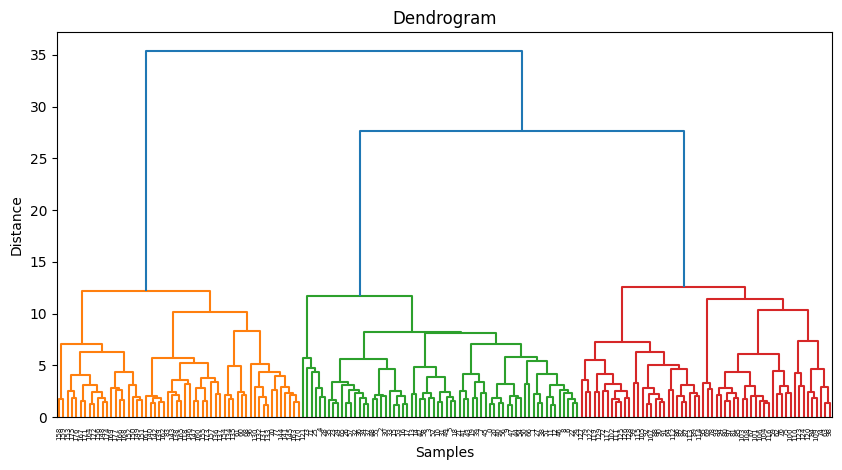

In [2]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Agglomerative Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3)
labels_hc = hc.fit_predict(X_scaled)

# Scatter plot of first two features
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_hc, cmap='rainbow')
plt.title("Hierarchical Clustering (n_clusters=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


## Step 3: DBSCAN Clustering
We will:
- Apply **DBSCAN** to the standardized dataset.
- Experiment with `eps` and `min_samples` parameters.
- Visualize clusters and noise points.
- Evaluate clustering quality using:
  - **Silhouette Score**
  - **Homogeneity Score**
  - **Completeness Score**


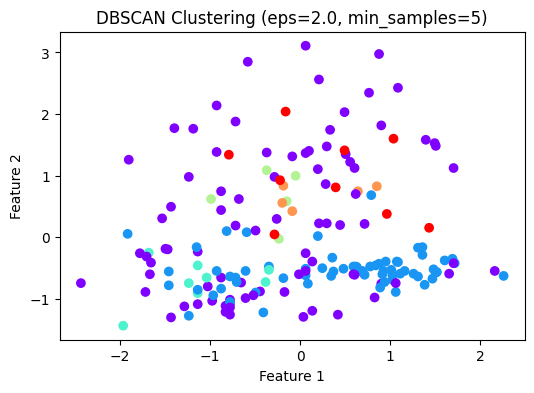

Unique labels: [-1  0  1  2  3  4]
Silhouette Score: -0.032906139982209724
Homogeneity Score: 0.36235372701413915
Completeness Score: 0.32473396566508933


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import numpy as np

# Try different eps and min_samples
db = DBSCAN(eps=2.0, min_samples=5).fit(X_scaled)
labels_db = db.labels_

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_db, cmap='rainbow')
plt.title("DBSCAN Clustering (eps=2.0, min_samples=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Check unique labels
unique_labels = np.unique(labels_db)
print("Unique labels:", unique_labels)

# Only compute metrics if we have at least 2 clusters
if len(unique_labels) > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, labels_db))
    print("Homogeneity Score:", homogeneity_score(wine.target, labels_db))
    print("Completeness Score:", completeness_score(wine.target, labels_db))
else:
    print("DBSCAN produced only one cluster. Try adjusting eps/min_samples.")


## Step 4: Analysis and Insights
- **Comparison:** Hierarchical clustering provides a clear tree-like structure, while DBSCAN handles noise and forms arbitrary shapes.
- **Parameter Influence:** 
  - `n_clusters` in hierarchical affects how groups are merged.
  - `eps` and `min_samples` in DBSCAN strongly influence cluster shape and noise detection.
- **Strengths/Weaknesses:**
  - Hierarchical is better for small datasets and interpretable dendrograms.
  - DBSCAN is robust to noise but sensitive to parameter tuning.
